<a href="https://colab.research.google.com/github/khushidubeyokok/PyTorch/blob/main/LinearRegressionFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Linear Regression model from scratch

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Creating data

Swedish auto insurance dataset from kaggle
https://www.kaggle.com/datasets/redwankarimsony/auto-insurance-in-sweden

In [149]:
data = pd.read_csv('/content/swedish_insurance.csv')

In [150]:
# check data
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [151]:
#check for missing values
data.isnull().sum()

,0
X,0
Y,0


In [152]:
x=data['X'].values
y=data['Y'].values

In [153]:
x=np.c_[np.ones(len(x)),x]
x=x.T

## compute predictions

In [154]:
def compute_predictions(params,x):
  predictions = np.matmul(params.T,x)
  return predictions

## Compute cost/loss MSE = 1/2m * sum(errors)^2

In [155]:
def compute_cost(predictions,target):
  m=len(target)
  errors=predictions-target
  squared_errors=errors*errors
  mse=np.sum(squared_errors)/(2*m)
  return mse

## Gradient descent



1.   Initialise params randomly
2.   Calculate the predictions
3.   Calculate loss
4.   Update params = params - LearningRate*partialDerivatives
5.   Repeat setp two to four until we converge




In [156]:
def sgd(x,y,lr,epochs):
  m=len(y)
  params = np.zeros(x.shape[0])
  print(params)
  costs=[]
  for epoch in range(epochs):
    prediction = compute_predictions(params,x)
    costs.append(compute_cost(prediction,y))
    errors = prediction - y
    der = (1/m)*np.matmul(x,errors)
    params = params - (lr*der)
  return params,costs

In [157]:
lr=0.0001
epochs=500
params,costs=sgd(x,y,lr,epochs)

[0. 0.]


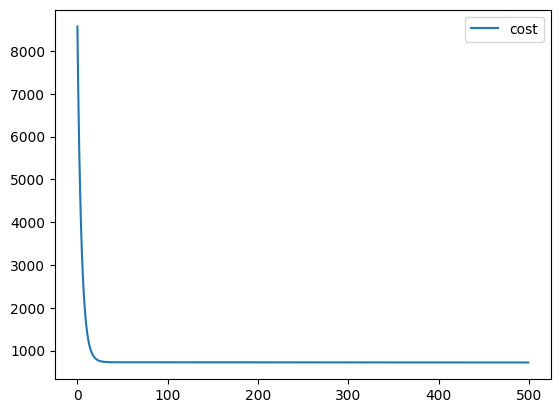

In [158]:
plt.plot(np.arange(500),costs,label='cost')
plt.legend(loc='upper right')

In [159]:
params #initially it was Zero

array([0.57989832, 3.83303054])

In [160]:
predictions=compute_predictions(params,x)

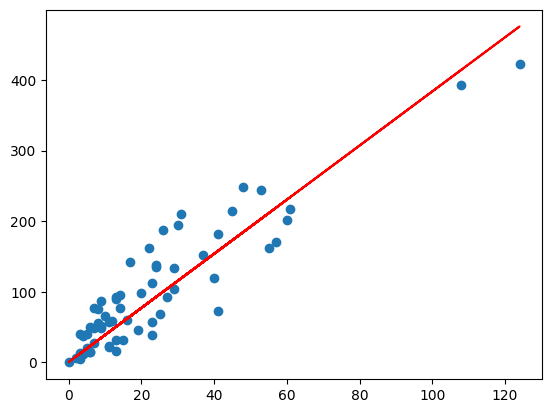

In [161]:
plt.scatter(x[1,:],y, label = 'target')
plt.plot(x[1,:], predictions, c='r', label = 'predicitons')